# <center> Étude sur la compétitivité des ligues de Football</center>

## Intro

Je passe un temps excessif sur Reddit, en particulier sur le sous-forum r/soccer. Cette plateforme est majoritairement fréquentée par des utilisateurs américains et britanniques, et la Premier League (la ligue anglaise) y est le sujet le plus discuté. Au cours de la dernière décennie, la Liga espagnole était considérée comme la meilleure ligue de football au monde. Mais il était répété que, bien que La Liga puisse être techniquement supérieure, la Premier League était "plus compétitive".

L'idée était que dans La Liga, la course au titre se résumait souvent au Real Madrid et au FC Barcelone, tandis qu'en Premier League, elle était plus variée. On avançait que, bien que les meilleures équipes de Premier League n'était pas aussi dominantes en europe, le niveau global de la compétition était plus uniformément réparti entre les équipes.

Aujourd'hui, la Premier League est considérée à juste titre comme la meilleure ligue du monde. Cependant, la perception qu'elle est toujours la "plus compétitive" persiste. Ce sentiment semble souvent être basé sur des impressions subjectives plutôt que sur une analyse concrète, en particulier de la part de ceux qui suivent principalement cette même ligue. Cela m'a amené à me demander si nous pourrions utiliser des mesures mathématiques pour démontrer de manière objective le niveau de compétitivité dans les ligues de football.

## Competitive Level

Pour quantifier de manière objective la compétitivité relative entre deux ligues, on peut initialement comparer le nombre d'équipes distinctes ayant remporté la victoire sur une période spécifique, comme une décennie.

Cependant, cette mesure unique pourrait s'avérer insuffisante. Par exemple, une ligue où une équipe gagne 9 fois et une autre seulement une fois produirait le même nombre de vainqueurs uniques qu'une ligue où deux équipes remportent chacune 5 victoires. Pourtant, le second scénario est plus compétitif.

Une métrique statistique améliorée pourrait consister à examiner le nombre moyen de victoires remportées par les équipes championnes de la ligue. Dans le second exemple, cela se traduirait par une moyenne de 5 victoires dans les deux cas. Malgré cette amélioration, il reste peut-être des opportunités d'optimisation. L'intégration du concept d'écart-type dans l'analyse pourrait apporter un éclairage supplémentaire :

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat

In [2]:
LeagueA = [9,1]
LeagueB = [5,5]
print (np.std(LeagueA))
print (np.std(LeagueB))

4.0
0.0


L'écart-type apparaît comme une métrique à surveiller, elle nous permet de différencier entre la Ligue A et la Ligue B. 

Envisageons désormais un scénario où une troisième ligue (Ligue C) compte dix équipes, chacune remportant une seule victoire. Cette Ligue C incarne le niveau de compétitivité le plus élevé qu'une ligue puisse atteindre. Dans ce cas, l'écart-type serait nul, signifiant que si nous nous basions uniquement sur cette mesure, nous ne pourrions pas distinguer la Ligue C de la Ligue B.

Cependant, la Ligue C afficherait une moyenne inférieure à celle de la Ligue B. Combiner l'écart-type et la moyenne pourrait potentiellement servir de métrique composite. Une valeur résultante plus basse suggérerait un plus grand nombre d'équipes victorieuses distinctes et une répartition des victoires plus équilibrée. Cette métrique combinée pourrait potentiellement offrir des éclairages précieux sur le paysage compétitif des ligues en question.

Voyons cela à travers quelques exemples :

In [3]:
LeagueC=[1]*10
print ("League A Competitive Level :",np.std(LeagueA)+ np.mean(LeagueA))
print ("League B Competitive Level :",np.std(LeagueB)+ np.mean(LeagueB))
print ("League C Competitive Level :",np.std(LeagueC)+ np.mean(LeagueC))

League A Competitive Level : 9.0
League B Competitive Level : 5.0
League C Competitive Level : 1.0


Cette approche semble prometteuse. Nous allons désigner cette métriquepar "Competitive Level". Un Competitive Level plus bas indique une ligue plus compétitive.

Cependant, il est important de noter que la compétitivité d'une ligue ne se résume pas uniquement au vainqueur du trophée. Elle dépend également des équipes en compétition pour les places européennes de premier plan et de celles qui luttent pour éviter la relégation.

Utiliser la moyenne des points gagnés au cours d'une saison pour l'ensemble de la ligue ne fournirait pas d'informations significatives dans ce contexte, car elle serait principalement influencée par le nombre de matchs nuls, qui accordent seulement 2 points par rapport aux 3 points attribués pour une victoire.

En revanche, l'écart-type des points gagnés par match dans l'ensemble de la ligue s'avère être un indicateur intéressant. Un écart-type plus bas suggère une compétition plus équilibrée entre les équipes.

Par conséquent, nous allons calculer :

-Le Competitive Level du vainqueur.

-Le Competitve Level des six meilleures équipes.

-L'écart-type des points par match dans toute la ligue.

Cette approche nous permettra de déterminer quelle ligue est la plus compétitive au cours de la dernière décennie.

Après avoir établi notre approche globale, il est crucial d'examiner de près les considérations spécifiques lors des comparaisons entre les ligues. Par exemple, il est sage d'écarter l'année anormalement impactée par la COVID-19 de notre analyse. Cela revêt une importance cruciale en raison des effets divers qu'elle a eus sur différentes ligues, tel que l'arrêt définitif des matchs dans des ligues comme la Ligue 1, contrairement à d'autres qui ont repris dans des conditions modifiées. Nous tiendrons compte de 10 années pour chaque ligue (les 11 dernières années moins celle de la COVID).

De plus, il est nécessaire d'aborder la différence de nombre d'équipes entre les ligues. Les ligues n'adoptent pas toutes le même format ; certaines comptent 20 équipes, tandis que d'autres en ont 18. De plus, il existe des variations dans les systèmes de relégation, certaines ligues en appliquant 2, tandis que d'autres en ont 3, entre autres configurations.

Il est important de noter que ces subtilités ne posent pas beaucoup de problèmes pour des mesures telles que le niveau de compétitivité, car elles concernent exclusivement les équipes classées en première position et les six meilleures équipes. De même, l'écart-type des points par match dans toute la ligue est calculé sur une base par match, ce qui rend les différences de taille de la ligue relativement peu pertinentes dans ce contexte. Cependant, il est évident qu'une disparité trop marquée (comme une ligue avec 10 équipes) aura manifestement un impact sur le niveau de compétitivité des six meilleures équipes. Nous resterons donc vigilants vis-à-vis de ces valeurs aberrantes.

## Collecte de données : Data scraping de transfertmarkt


Transfertmarket est une plateforme largement reconnue dans la communauté des statisticiens du football. Ses données sont étendues, diversifiées et fiables. Cependant, malheureusement, elles ne sont pas disponibles dans un format simple tel qu'un fichier CSV. Par conséquent, nous devrons recourir à la technique du scraping de données. Pour faire preuve de transparence, je tiens à préciser que Transfermarkt interdit le scraping de données. Cependant, comme mon projet est à usage personnel et sans but commercial, j'ai choisi de ne pas respecter cette restriction. Il va sans dire que dans un cadre professionnel, je ne me permettrais jamais d'utiliser des données sans l'autorisation formelle des parties impliquées.

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/laliga/tabelle/wettbewerb/ES1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Liga = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,"League" :"Liga","Season": SeasonList})
Liga


,Team,Standing,Points,Matchs,League,Season
0,Barcelone,1,100,38,Liga,2012
1,Real Madrid,2,85,38,Liga,2012
2,Atlético Madrid,3,76,38,Liga,2012
3,Real Sociedad,4,66,38,Liga,2012
4,FC Valencia,5,65,38,Liga,2012
...,...,...,...,...,...,...
195,Cádiz CF,16,42,38,Liga,2022
196,UD Almería,17,41,38,Liga,2022
197,Real Valladolid,18,40,38,Liga,2022
198,Esp. Barcelona,19,37,38,Liga,2022


In [8]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/premier-league/tabelle/wettbewerb/GB1/saison_id/20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Epl = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList, 'League': 'Epl',"Season": SeasonList})
Epl


,Team,Standing,Points,Matchs,League,Season
0,Manchester Utd.,1,89,38,Epl,2012
1,Manchester City,2,78,38,Epl,2012
2,Chelsea,3,75,38,Epl,2012
3,Arsenal,4,73,38,Epl,2012
4,Tottenham,5,72,38,Epl,2012
...,...,...,...,...,...,...
195,Nottm Forest,16,38,38,Epl,2022
196,FC Everton,17,36,38,Epl,2022
197,Leicester City,18,34,38,Epl,2022
198,Leeds United,19,31,38,Epl,2022


In [9]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/serie-a/tabelle/wettbewerb/IT1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Seriea = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Seriea',"Season": SeasonList})
Seriea

,Team,Standing,Points,Matchs,League,Season
0,Juventus Turin,1,87,38,Seriea,2012
1,Napoli,2,78,38,Seriea,2012
2,AC Milan,3,72,38,Seriea,2012
3,Fiorentina,4,70,38,Seriea,2012
4,Udinese,5,66,38,Seriea,2012
...,...,...,...,...,...,...
195,Lecce,16,36,38,Seriea,2022
196,Spezia Calcio,17,31,38,Seriea,2022
197,Hellas Verona,18,31,38,Seriea,2022
198,Cremonese,19,27,38,Seriea,2022


In [10]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/bundesliga/tabelle/wettbewerb/L1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Bdsl = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Bdsl',"Season": SeasonList})
Bdsl

,Team,Standing,Points,Matchs,League,Season
0,Bayern Munich,1,91,34,Bdsl,2012
1,Bor. Dortmund,2,66,34,Bdsl,2012
2,B. Leverkusen,3,65,34,Bdsl,2012
3,FC Schalke 04,4,55,34,Bdsl,2012
4,SC Fribourg,5,51,34,Bdsl,2012
...,...,...,...,...,...,...
175,VfL Bochum,14,35,34,Bdsl,2022
176,FC Augsburg,15,34,34,Bdsl,2022
177,VfB Stuttgart,16,33,34,Bdsl,2022
178,FC Schalke 04,17,31,34,Bdsl,2022


In [11]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/ligue-1/tabelle/wettbewerb/FR1/saison_id/20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
L1 = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'L1',"Season": SeasonList})
L1

,Team,Standing,Points,Matchs,League,Season
0,Paris SG,1,83,38,L1,2012
1,Marseille,2,71,38,L1,2012
2,Ol. Lyonnais,3,67,38,L1,2012
3,OGC Nice,4,64,38,L1,2012
4,Saint-Étienne,5,63,38,L1,2012
...,...,...,...,...,...,...
195,FC Nantes,16,36,38,L1,2022
196,AJ Auxerre,17,35,38,L1,2022
197,AC Ajaccio,18,26,38,L1,2022
198,Troyes,19,24,38,L1,2022


In [12]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/eredivisie/tabelle/wettbewerb/NL1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Eredi = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Eredi',"Season": SeasonList})
Eredi

,Team,Standing,Points,Matchs,League,Season
0,Ajax,1,76,34,Eredi,2012
1,PSV Eindhoven,2,69,34,Eredi,2012
2,Feyenoord,3,69,34,Eredi,2012
3,Vitesse,4,64,34,Eredi,2012
4,FC Utrecht,5,63,34,Eredi,2012
...,...,...,...,...,...,...
175,FC Volendam,14,36,34,Eredi,2022
176,Excelsior,15,32,34,Eredi,2022
177,FC Emmen,16,28,34,Eredi,2022
178,SC Cambuur,17,19,34,Eredi,2022


In [13]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (11,22):
    if i!=19:
        page="https://www.transfermarkt.fr/campeonato-brasileiro-serie-a/tabelle/wettbewerb/BRA1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Bra = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Bra',"Season": SeasonList})
Bra

,Team,Standing,Points,Matchs,League,Season
0,Fluminense,1,77,38,Bra,2011
1,Atlético-MG,2,72,38,Bra,2011
2,Grêmio,3,71,38,Bra,2011
3,FC São Paulo,4,66,38,Bra,2011
4,Vasco da Gama,5,58,38,Bra,2011
...,...,...,...,...,...,...
195,Cuiabá-MT,16,41,38,Bra,2021
196,Ceará SC,17,37,38,Bra,2021
197,Atlético-GO,18,36,38,Bra,2021
198,Avaí FC,19,35,38,Bra,2021


In [14]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/super-lig/tabelle/wettbewerb/TR1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Turk = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Turk',"Season": SeasonList})
Turk

,Team,Standing,Points,Matchs,League,Season
0,Galatasaray,1,71,34,Turk,2012
1,Fenerbahçe,2,61,34,Turk,2012
2,Besiktas,3,58,34,Turk,2012
3,Bursaspor,4,55,34,Turk,2012
4,Kayserispor,5,52,34,Turk,2012
...,...,...,...,...,...,...
181,Alanyaspor,15,41,36,Turk,2022
182,Giresunspor,16,40,36,Turk,2022
183,Ümraniyespor,17,30,36,Turk,2022
184,Gaziantep FK,18,25,36,Turk,2022


In [15]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (12,23):
    if i!=19:
        page="https://www.transfermarkt.fr/liga-portugal/tabelle/wettbewerb/PO1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Port = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Port',"Season": SeasonList})
Port

,Team,Standing,Points,Matchs,League,Season
0,FC Porto,1,78,30,Port,2012
1,Benfica,2,77,30,Port,2012
2,Paços Ferreira,3,54,30,Port,2012
3,SC Braga,4,52,30,Port,2012
4,Estoril Praia,5,45,30,Port,2012
...,...,...,...,...,...,...
171,Estoril Praia,14,35,34,Port,2022
172,Portimonense,15,34,34,Port,2022
173,Marítimo,16,26,34,Port,2022
174,Paços Ferreira,17,23,34,Port,2022


L'analyse de l'Égypte revêt une particularité, car les deux premières années portaient sur une ligue divisée en deux parties. Par conséquent, nous avons omis ces deux premières années de notre processus d'analyse.

In [16]:
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
TeamList = []
StandingList = []
PointsList=[]
SeasonList=[]
MatchsList=[]
for i in range (14,23):
    if i!=19:
        page="https://www.transfermarkt.fr/egyptian-premier-league/tabelle/wettbewerb/EGY1?saison_id=20"+str(i)
        pageTree = requests.get(page, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Team = pageSoup.find_all("td", {"class": "no-border-links hauptlink"})
        Standing = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Points = pageSoup.find_all("td", {"class": "zentriert"})
        Season='20'+str(i)
    
        for i in range(0,1+int(int(Points[1].text)/2)):
            TeamList.append(Team[i].text.strip('\n').strip('\xa0'))
            StandingList.append(int(Standing[i].text))
            PointsList.append(int(Points[8*i+7].text))
            SeasonList.append(Season)
            MatchsList.append(int(Points[8*i+1].text))
Egypt = pd.DataFrame({"Team":TeamList,"Standing":StandingList,'Points':PointsList,'Matchs':MatchsList,'League': 'Egypt',"Season": SeasonList})
Egypt

,Team,Standing,Points,Matchs,League,Season
0,Zamalek,1,87,38,Egypt,2014
1,El Ahly,2,79,38,Egypt,2014
2,Enppi SC,3,70,38,Egypt,2014
3,El Makasa,4,64,38,Egypt,2014
4,Wadi Degla,5,57,38,Egypt,2014
...,...,...,...,...,...,...
141,Gaish,14,36,34,Egypt,2022
142,El Dakhlia,15,35,34,Egypt,2022
143,Aswan SC,16,33,34,Egypt,2022
144,El Mahalla,17,33,34,Egypt,2022


In [17]:
All_league = pd.concat([Liga,Epl,Seriea,L1,Bra,Turk,Eredi,Bdsl,Port,Egypt])



League_list=['Liga','Epl','Seriea','L1','Bra','Turk','Eredi','Bdsl','Port','Egypt']
Value_list=['Unique Winner', 'Complvl Winner', 'Unique Top 6', 'Complvl Top 6', 'Std All']
All_league

,Team,Standing,Points,Matchs,League,Season
0,Barcelone,1,100,38,Liga,2012
1,Real Madrid,2,85,38,Liga,2012
2,Atlético Madrid,3,76,38,Liga,2012
3,Real Sociedad,4,66,38,Liga,2012
4,FC Valencia,5,65,38,Liga,2012
...,...,...,...,...,...,...
141,Gaish,14,36,34,Egypt,2022
142,El Dakhlia,15,35,34,Egypt,2022
143,Aswan SC,16,33,34,Egypt,2022
144,El Mahalla,17,33,34,Egypt,2022


## Calcule de nos indicateurs

In [18]:
Unique_winner=[]
Complvl_winner=[]
for i in range(0,10):
    Mask_wnr=(All_league['Standing']==1) & (All_league['League']==League_list[i])
    Unique_winner.append(len(All_league[Mask_wnr].groupby('Team').count()))
    Complvl_winner.append(((np.std(All_league[Mask_wnr].groupby('Team').count(),axis=0)+np.mean(All_league[Mask_wnr].groupby('Team').count())).drop(['Points','Matchs','League','Season'])).to_numpy())
    Unique_winner[i]=float(Unique_winner[i])
    Complvl_winner[i]=float(Complvl_winner[i][0])
print(Unique_winner)
print(Complvl_winner)

[3.0, 4.0, 4.0, 3.0, 6.0, 4.0, 3.0, 1.0, 3.0, 2.0]
[5.21895141649746, 4.561552812808831, 5.098076211353316, 6.633164978870555, 2.4120226591665967, 4.1583123951777, 4.58055246225798, 10.0, 5.38813800098966, 5.0]


In [19]:
Unique_top6=[]
Complvl_top6=[]
for i in range(0,10):
    Mask_top6=(All_league['Standing']<7) & (All_league['League']==League_list[i])
    Unique_top6.append(len(All_league[Mask_top6].groupby('Team').count()))
    Complvl_top6.append(((np.std(All_league[Mask_top6].groupby('Team').count(),axis=0)+np.mean(All_league[Mask_top6].groupby('Team').count(),axis=0)).drop(['Points','Matchs','League','Season'])).to_numpy())
    Unique_top6[i]=float(Unique_top6[i])
    Complvl_top6[i]=float(Complvl_top6[i][0])
print(Unique_top6)
print(Complvl_top6)


[12.0, 12.0, 12.0, 12.0, 19.0, 17.0, 11.0, 15.0, 16.0, 12.0]
[8.366501646120692, 8.719318934070234, 8.3166247903554, 8.082207001484488, 5.164807996309223, 7.012440316020579, 9.229188998550308, 7.0550504633038935, 7.34687364248454, 6.23606797749979]


In [20]:
Std_all=[]
for i in range(0,10):
    temp=[]
    Mask_league=All_league['League']==League_list[i]
    Std_all.append(np.std(All_league[Mask_league]['Points']/All_league[Mask_league]['Matchs']))
    Std_all[i]=float(Std_all[i])
print(Std_all)

[0.4569541913189865, 0.47234452365881296, 0.48016011872310715, 0.41767922903305954, 0.33796492988274174, 0.40877587399726306, 0.4860164679658584, 0.4344010102271402, 0.5361616080109911, 0.4455158808134059]



Afin de faciliter la compréhension, nous allons d'abord standardiser les valeurs. Ensuite, nous inverserons l'échelle, attribuant 1 à la plus grande compétitivité et 0 à la plus faible. Enfin, nous calculerons la moyenne de nos trois mesures : le niveau de compétitivité du vainqueur, le niveau de compétitivité des meilleurs et l'écart-type des points par match. Cette approche permet aux spectateurs de saisir rapidement le graphique, même sans une connaissance préalable de notre méthodologie.


In [21]:
Result= pd.DataFrame({'League':League_list,'Complvl Winner':Complvl_winner,'Complvl Top 6':Complvl_top6,'Std All':Std_all})
Value_list=['Complvl Winner','Complvl Top 6', 'Std All']
Standing=list(range(1,11,1))


for i in range(0,len(Value_list)):  
    temp=pd.DataFrame(Result.sort_values(by=Value_list[i],ascending=True)['League'])
    temp[Value_list[i]+' Standing']=Standing
    Result=Result.merge(temp,on='League')
for i in range (0, len(Value_list)):
    min=np.min(Result[Value_list[i]])
    max=np.max(Result[Value_list[i]])
    temp=pd.DataFrame(np.abs((Result[Value_list[i]]-max)/(max-min)))
    Result[Value_list[i]+' Normalized']=temp
    
Result['Final Average Normalized']=Result.iloc[:,8:11].mean(axis=1)
temp=pd.DataFrame(Result.sort_values(by='Final Average Normalized',ascending=False)['League'])
temp['Final Average'+' Standing']=Standing
Result=Result.merge(temp,on='League')
Result['Leagueplot']=['LaLiga','Premier League','Serie A','Ligue 1','Brasileirão','SüperLig','Eredivise','Bundesliga','Liga Portugal','Egyptian Premier League']
Result


,League,Complvl Winner,Complvl Top 6,Std All,Complvl Winner Standing,Complvl Top 6 Standing,Std All Standing,Complvl Winner Normalized,Complvl Top 6 Normalized,Std All Normalized,Final Average Normalized,Final Average Standing,Leagueplot
0,Liga,5.218951,8.366502,0.456954,7,8,6,0.630082,0.212256,0.399640,0.305948,6,LaLiga
1,Epl,4.561553,8.719319,0.472345,3,9,7,0.716719,0.125448,0.321989,0.223719,9,Premier League
2,Seriea,5.098076,8.316625,0.480160,6,7,8,0.646012,0.224527,0.282555,0.253541,7,Serie A
3,L1,6.633165,8.082207,0.417679,9,6,3,0.443707,0.282203,0.597802,0.440003,5,Ligue 1
4,Bra,2.412023,5.164808,0.337965,1,1,1,1.000000,1.000000,1.000000,1.000000,1,Brasileirão
5,Turk,4.158312,7.012440,0.408776,2,3,2,0.769861,0.545409,0.642724,0.594066,3,SüperLig
6,Eredi,4.580552,9.229189,0.486016,4,10,9,0.714215,0.000000,0.253007,0.126503,10,Eredivise
7,Bdsl,10.000000,7.055050,0.434401,10,4,4,0.000000,0.534925,0.513432,0.524179,4,Bundesliga
8,Port,5.388138,7.346874,0.536162,8,5,10,0.607785,0.463125,0.000000,0.231562,8,Liga Portugal
9,Egypt,5.000000,6.236068,0.445516,5,2,5,0.658937,0.736427,0.457352,0.596890,2,Egyptian Premier League


## Présentation Visuelle de nos Résultats

In [22]:
import matplotlib.pyplot as plt


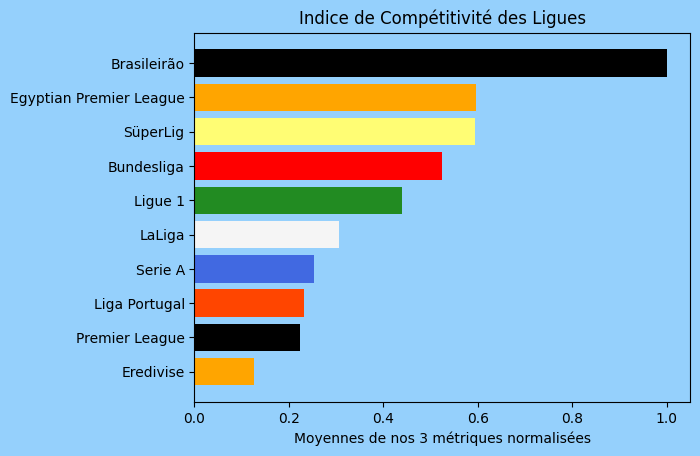

In [23]:
Result_plot=pd.DataFrame(Result.sort_values(by='Final Average Normalized',ignore_index=True,ascending=True))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Final Average Normalized'], label='Average Standing', align='center',color=['orange','black','orangered','royalblue','whitesmoke','forestgreen','red','xkcd:butter yellow'])
ax.set_title('Indice de Compétitivité des Ligues')
ax.set_xlabel('Moyennes de nos 3 métriques normalisées')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph1',bbox_inches='tight',dpi=300)
plt.show()

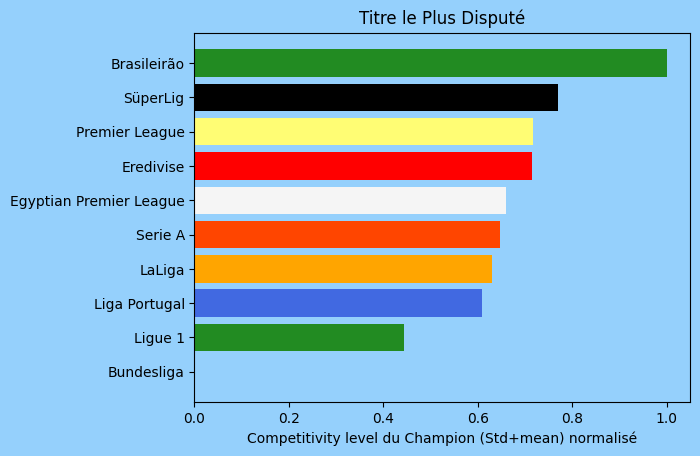

In [24]:
Result_plot=pd.DataFrame(Result.sort_values(by='Complvl Winner Normalized',ignore_index=True,ascending=True))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Complvl Winner Normalized'], label='Average Standing', align='center',color=['black','forestgreen','royalblue','orange','orangered','whitesmoke','red','xkcd:butter yellow'])
ax.set_title('Titre le Plus Disputé')
ax.set_xlabel('Competitivity level du Champion (Std+mean) normalisé')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph2',bbox_inches='tight',dpi=300)
plt.show()

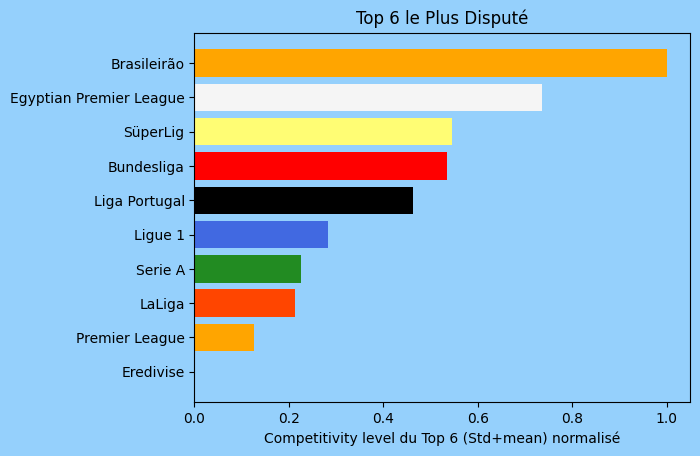

In [25]:
Result_plot=pd.DataFrame(Result.sort_values(by='Complvl Top 6 Normalized',ignore_index=True,ascending=True))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Complvl Top 6 Normalized'], label='Average Standing', align='center',color=['whitesmoke','orange','orangered','forestgreen','royalblue','black','red','xkcd:butter yellow'])
ax.set_title('Top 6 le Plus Disputé')
ax.set_xlabel('Competitivity level du Top 6 (Std+mean) normalisé')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph3',bbox_inches='tight',dpi=300)
plt.show()

In [26]:
plt.get_backend()

'module://matplotlib_inline.backend_inline'

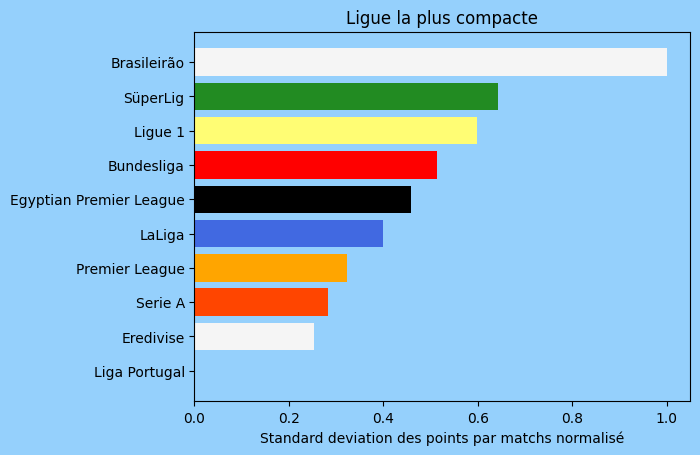

In [27]:
Result_plot=pd.DataFrame(Result.sort_values(by='Std All Normalized',ignore_index=True,ascending=True))
back=plt.imread('bra.jpg')
fig, ax = plt.subplots()
#ax.imshow(back,extent=[1,1])
ax.barh(Result_plot['Leagueplot'],Result_plot['Std All Normalized'], label='Average Standing', align='center',color=['forestgreen','whitesmoke','orangered','orange','royalblue','black','red','xkcd:butter yellow'])
ax.set_title('Ligue la plus compacte')
ax.set_xlabel('Standard deviation des points par matchs normalisé')
ax.set_facecolor('xkcd:light blue')
fig.patch.set_facecolor('xkcd:light blue')
plt.savefig('graph5',bbox_inches='tight',dpi=300)
plt.show()

## Conclusion

En résumé, notre analyse révèle que bien que les amateurs de la Premier League aient tendance à vanter leur ligue comme étant la meilleure et la plus disputée, notre analyse suggère une réalité différente. Il semble que le niveau de compétition ne soit pas aussi élevé qu'il est souvent proclamé. Si la diversité des vainqueurs constitue un point fort pour la Premier League, d'autres aspects méritent d'être soulignés. La prévisibilité du Top6 ainsi que la profondeur de la ligue dans son ensemble laissent place à des améliorations.

Cela dit, si vous recherchez une ligue véritablement compétitive, le Brasileiro s'érige indiscutablement comme le choix privilégié. Cette ligue offre un mariage harmonieux entre un niveau de qualité et une compétition des plus féroces, créant ainsi un environnement propice à l'épanouissement du talent et à l'excitation des fans.